# Optimization

**Prerequisites**

- [Introduction to Numpy](https://datascience.quantecon.org/numpy_arrays.html)  
- [Applied Linear Algebra](https://datascience.quantecon.org/applied_linalg.html)  


**Outcomes**

- Perform optimization by hand using derivatives  
- Understand ideas from gradient descent  

## Outline

- [Optimization](#Optimization)  
  - [What is Optimization?](#What-is-Optimization?)  
  - [Exercises](#Exercises)  

In [9]:
pip install qeds

Note: you may need to restart the kernel to use updated packages.


In [10]:
# imports for later
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
# activate plot theme
import qeds
qeds.themes.mpl_style();

## What is Optimization?

Optimization is the branch of mathematics focused on finding extreme values (max or min) of
functions.

Optimization tools will appear in many places throughout this course, including:

- Building economic models in which individuals make decisions that maximize their utility.  
- Building statistical models and maximizing the fit of these models by optimizing certain fit
  functions.  


In this lecture, we will focus mostly on the first to limit the moving pieces, but in other lectures, we’ll discuss the second in detail.

### Derivatives and Optima

Here, we revisit some of the theory that you have already learned in your calculus class.

Consider function $ f(x) $ which maps a number into another number. We can say that any point
where $ f'(x) = 0 $ is a local extremum of $ f $.

Let’s work through an example. Consider the function

$$
f(x) = x^4 - 3 x^2
$$

Its derivative is given by

$$
\frac{\partial f}{\partial x} = 4 x^3 - 6 x
$$

Let’s plot the function and its derivative to pick out the local extremum by hand.

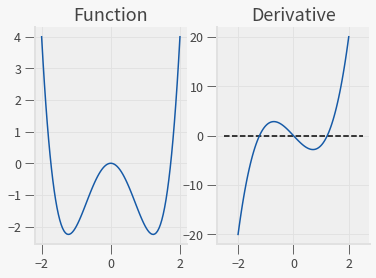

In [11]:
def f(x):
    return x**4 - 3*x**2


def fp(x):
    return 4*x**3 - 6*x

# Create 100 evenly spaced points between -2 and 2
x = np.linspace(-2., 2., 100)

# Evaluate the functions at x values
fx = f(x)
fpx = fp(x)

# Create plot
fig, ax = plt.subplots(1, 2)

ax[0].plot(x, fx)
ax[0].set_title("Function")

ax[1].plot(x, fpx)
ax[1].hlines(0.0, -2.5, 2.5, color="k", linestyle="--")
ax[1].set_title("Derivative")

for _ax in ax:
    _ax.spines["right"].set_visible(False)
    _ax.spines["top"].set_visible(False)

If you stare at this picture, you can probably determine the the local maximum is at
$ x = 0 $ and the local minima at $ x \approx -1 $ and $ x \approx 1 $.

To properly determine the minima and maxima, we find the solutions to $ f'(x) = 0 $ below:

$$
f'(x) = 4 x^3 - 6 x = 0
$$

$$
\rightarrow x = \{0, \frac{\sqrt{6}}{2}, \frac{-\sqrt{6}}{2} \}
$$

Let’s check whether we can get the same answers with Python! To do this, we import a new
package that we haven’t seen yet.

In [12]:
import scipy.optimize as opt

Then using the function definitions from earlier, we search for the minimum and maximum values.

In [13]:
# For a scalar problem, we give it the function and the bounds between
# which we want to search
neg_min = opt.minimize_scalar(f, [-2, -0.5])
pos_min = opt.minimize_scalar(f, [0.5, 2.0])
print("The negative minimum is: \n", neg_min)
print("The positive minimum is: \n", pos_min)

The negative minimum is: 
      fun: -2.2499999999999996
    nfev: 16
     nit: 12
 success: True
       x: -1.2247448697638397
The positive minimum is: 
      fun: -2.2499999999999996
    nfev: 16
     nit: 12
 success: True
       x: 1.2247448697638397


The scipy optimize package only has functions that find minimums… You might be wondering, then, how we
will verify our maximum value.

It turns out that finding the maximum is equivalent to simply finding the minimum of the negative function.

In [14]:
# Create a function that evaluates to negative f
def neg_f(x):
    return -f(x)

max_out = opt.minimize_scalar(neg_f, [-0.35, 0.35])
print("The maximum is: \n", max_out)

The maximum is: 
      fun: 1.1519919564363613e-23
    nfev: 13
     nit: 9
 success: True
       x: 1.9595849530247992e-12


We won’t dive into the details of optimization algorithms in this lecture, but we’ll impart some brief
intuition to help you understand the types of problems these algorithms are good at solving and
the types of problems they will struggle with:

The general intuition is that when you’re finding a maximum, an algorithm takes a step
in the direction of the derivative… (Conversely, to find a minimum, the algorithm takes a step opposite the direction of the derivative.)
This requires the function to be relatively smooth and continuous. The algorithm also has an easier time if there is only one (or very few) extremum to be found…

For minimization, you can imagine the algorithm as a marble in a bowl.

The marble will keep rolling down the slope of the bowl until it finds the bottom.

It may overshoot, but once it hits the slope on the other side, it will continue to roll back
and forth until it comes to rest.

Thus, when deciding whether numerical optimization is an effective method for a
particular problem, you could try visualizing the function to determine whether a marble
would be able to come to rest at the extreme values you are looking for.

### Application: Consumer Theory

A common use of maximization in economics is to model
optimal consumption decisions <https://en.wikipedia.org/wiki/Consumer_choice>.

#### Preferences and Utility Functions

To summarize introductory economics, take a set of
[preferences](https://en.wikipedia.org/wiki/Preference_%28economics%29) of consumers over “bundles”
of goods (e.g. 2 apples and 3 oranges is preferred to 3 apples and 2 oranges, or a 100% chance to
win $ 1 $ dollar is preferred to a 50% chance to win $ 2.10 $ dollars).

Under certain assumptions, you rationalize the preferences as a utility function over the different
goods (always remembering that the utility is simply a tool to order preferences and the numbers are
usually not meaningful themselves).

For example, consider a utility function over bundles of bananas (B) and apples (A)

$$
U(B, A) = B^{\alpha}A^{1-\alpha}
$$

Where $ \alpha \in [0,1] $.

First, let’s take a look at this particular utility function.

Text(0, 0.5, 'U(B=1.5, A)')

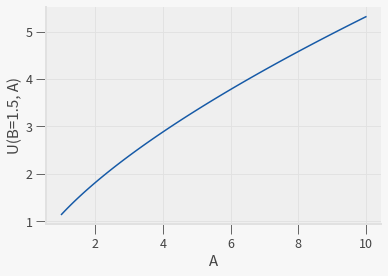

In [15]:
def U(A, B, alpha=1/3):
    return B**alpha * A**(1-alpha)

fig, ax = plt.subplots()
B = 1.5
A = np.linspace(1, 10, 100)
ax.plot(A, U(A, B))
ax.set_xlabel("A")
ax.set_ylabel("U(B=1.5, A)")

We note that

- 
  <dl style='margin: 20px 0;'>
  <dt>$ U(B,1) $ is always higher with more $ B $, hence, consuming more bananas has a</dt>
  <dd>
  positive marginal utility  i.e. $ \frac{d U(B,1)}{d B} > 0 $.  
  </dd>
  
  </dl>
  
- The more bananas we consume, the smaller the change in marginal utility, i.e.
  $ \frac{d^2 U(B,1)}{d B^2} < 0 $.  


If we plot both the $ B $ and the $ A $, we can see how the utility changes with different
bundles.

Text(0.5, 1.0, 'U(A,B)')

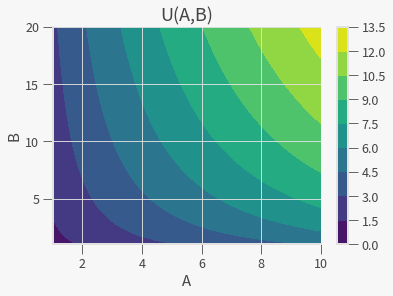

In [16]:
fig, ax = plt.subplots()
B = np.linspace(1, 20, 100).reshape((100, 1))
contours = ax.contourf(A, B.flatten(), U(A, B))
fig.colorbar(contours)
ax.set_xlabel("A")
ax.set_ylabel("B")
ax.set_title("U(A,B)")

We can find the bundles between which the consumer would be indifferent by fixing a
utility $ \bar{U} $ and by determining all combinations of $ A $ and $ B $ where
$ \bar{U} = U(B, A) $.

In this example, we can implement this calculation by letting $ B $ be the variable on the
x-axis and solving for $ A(\bar{U}, B) $

$$
A(B, \bar{U}) = U^{\frac{1}{1-\alpha}}B^{\frac{-\alpha}{1-\alpha}}
$$

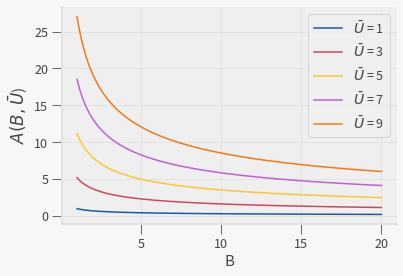

In [17]:
def A_indifference(B, ubar, alpha=1/3):
    return ubar**(1/(1-alpha)) * B**(-alpha/(1-alpha))

def plot_indifference_curves(ax, alpha=1/3):
    ubar = np.arange(1, 11, 2)
    ax.plot(B, A_indifference(B, ubar, alpha))
    ax.legend([r"$\bar{U}$" + " = {}".format(i) for i in ubar])
    ax.set_xlabel("B")
    ax.set_ylabel(r"$A(B, \bar{U}$)")

fig, ax = plt.subplots()
plot_indifference_curves(ax)

Note that in every case, if you increase either the number of apples or bananas (holding the other
fixed), you reach a higher indifference curve.

Consequently, in a world without scarcity or budgets, consumers would consume
an arbitrarily high number of both to maximize their utility.

#### Budget Constraints

While the above example plots consumer preferences, it says nothing about what the consumers can afford.

The simplest sort of constraint is a budget constraint where bananas and apples both have a price
and the consumer has a limited amount of funds.

If the prices per banana and per apple are identical, no matter how many you consume, then the
affordable bundles are simply all pairs of apples and bananas below the line.
$ p_a A + p_b B \leq W $.

For example, if consumer has a budget of $ W $, the price of apples is $ p_A = 2 $ dollars per
apple, and the price of bananas is normalized to be $ p_B = 1 $ dollar per banana, then the consumer
can afford anything below the line.

$$
2 A + B \leq W
$$

Or, letting $ W = 20 $ and plotting

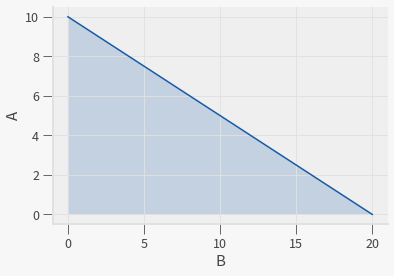

In [18]:
def A_bc(B, W=20, pa=2):
    "Given B, W, and pa return the max amount of A our consumer can afford"
    return (W - B) / pa

def plot_budget_constraint(ax, W=20, pa=2):
    B_bc = np.array([0, W])
    A = A_bc(B_bc, W, pa)
    ax.plot(B_bc, A)
    ax.fill_between(B_bc, 0, A, alpha=0.2)
    ax.set_xlabel("B")
    ax.set_ylabel("A")
    return ax

fig, ax = plt.subplots()
plot_budget_constraint(ax, 20, 2)

While the consumer can afford any of the bundles in that area, most will not be optimal.

#### Optimal Choice

Putting the budget constraints and the utility functions together lets us visualize the optimal
decision of a consumer. Choose the bundle with the highest possible indifference curve within its
budget set.

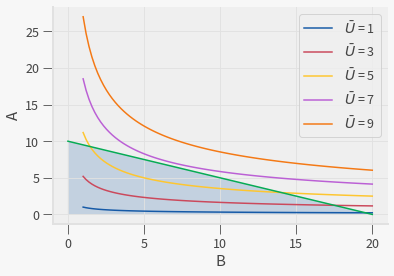

In [19]:
fig, ax = plt.subplots()
plot_indifference_curves(ax)
plot_budget_constraint(ax)

We have several ways to find the particular point $ A, B $ of maximum utility, such as
finding the point where the indifference curve and the budget constraint have the same slope, but a
simple approach is to just solve the direct maximization problem.

$$
\begin{aligned}
\max_{A, B} & B^{\alpha}A^{1-\alpha}\\
\text{s.t. } & p_A A + B \leq W
\end{aligned}
$$

Solving this problem directly requires solving a multi-dimensional constrained optimization problem,
where scipy <https://docs.scipy.org/doc/scipy/reference/tutorial/optimize.html#constrained-minimization-of-multivariate-scalar-functions-minimize>
has several options.

For this particular problem, we notice two things: (1) The utility function is increasing in both
$ A $ and $ B $, and (2) there are only 2 goods.

This allows us 1) to assume that the budget constraint holds at equality, $ p_a A + B = W $, 2) to
form a new function $ A(B) = (W - B) / p_a $ by rearranging the budget constraint at equality, and
3) to substitute that function directly to form:

$$
\max_{B}  B^{\alpha}A(B)^{1-\alpha}
$$

Compared to before, this problem has been turned into an unconstrained univariate optimization
problem.

To implement this in code, notice that the $ A(B) $ function is what we defined before
as `A_bc`.

We will solve this by using the function `scipy.optimize.minimize_scalar`, which takes a function
`f(x)` and returns the value of `x` that minimizes `f`.

In [20]:
from scipy.optimize import minimize_scalar

def objective(B, W=20, pa=2):
    """
    Return value of -U for a given B, when we consume as much A as possible

    Note that we return -U because scipy wants to minimize functions,
    and the value of B that minimizes -U will maximize U
    """
    A = A_bc(B, W, pa)
    return -U(A, B)

result = minimize_scalar(objective)
optimal_B = result.x
optimal_A = A_bc(optimal_B, 20, 2)
optimal_U = U(optimal_A, optimal_B)

print("The optimal U is ", optimal_U)
print("and was found at (A,B) =", (optimal_A, optimal_B))

The optimal U is  6.666666666666667
and was found at (A,B) = (6.666666630651958, 6.666666738696083)


This allows us to do experiments, such as examining how consumption patterns change as prices or
wealth levels change.

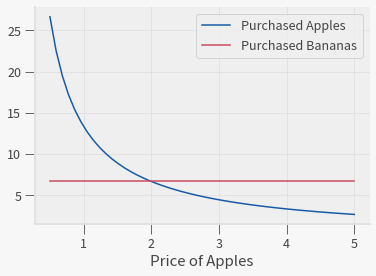

In [21]:
# Create various prices
n_pa = 50
prices_A = np.linspace(0.5, 5.0, n_pa)
W = 20

# Create lists to store the results of the optimal A and B calculation
optimal_As = []
optimal_Bs = []
for pa in prices_A:
    result = minimize_scalar(objective, args=(W, pa))
    opt_B_val = result.x

    optimal_Bs.append(opt_B_val)
    optimal_As.append(A_bc(opt_B_val, W, pa))

fig, ax = plt.subplots()

ax.plot(prices_A, optimal_As, label="Purchased Apples")
ax.plot(prices_A, optimal_Bs, label="Purchased Bananas")
ax.set_xlabel("Price of Apples")
ax.legend()


<a id='exercise-0'></a>
> See exercise 1 in the [*exercise list*](https://datascience.quantecon.org/#exerciselist-0)

#### Satiation Point

The above example is a particular utility function where consumers prefer to “eat” as much as
possible of every good available, but that may not be the case for all preferences.

When an optimum exists for the unconstrained problem (e.g. with an infinite budget), it is called a
bliss point, or satiation.

Instead of bananas and apples, consider a utility function for potato chips (`P`) and chocolate
bars (`C`).

$$
U(P, C) = -(P - 20)^2 - 2 * (C - 1)^2
$$

To numerically calculate the maximum (which you can probably see through inspection), one must directly solve the constrained maximization problem.


<a id='exercise-1'></a>
> See exercise 2 in the [*exercise list*](https://datascience.quantecon.org/#exerciselist-0)

Text(0, 0.5, 'U(C)')

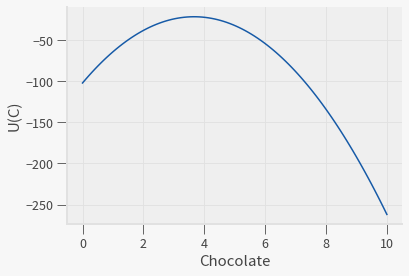

In [37]:

# Your code here
def basket(C, W=10, p_P=1, p_C=2):
    return -(((W-(p_C * C))/ p_P))**2 - 2*(C-1)**2
#Function resulting from solving for P from the budget constraint and plugging in to have all in terms of C
W = 10
p_P = 1
p_C = 2

C = np.linspace(0, 10, 100)

basket_c = basket(C, W, p_P, p_C)

fig, ax = plt.subplots()

ax.plot(C, basket_c)

ax.set_xlabel("Chocolate")
ax.set_ylabel("U(C)")

In [39]:
def neg_basket(C, W=10, p_P=1, p_C=2):
    return -basket_c

max_u = opt.minimize_scalar(neg_basket, [0, 10])  
print(max_u)

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [23]:
# Your code here

In [24]:
# Your code here

## Exercises


<a id='exerciselist-0'></a>
**Exercise 1**

Try solving the constrained maximization problem by hand via the Lagrangian method.

Is it surprising that the demand for bananas is unaffected by the change in apple prices?

Why might this be?

([*back to text*](https://datascience.quantecon.org/#exercise-0))

**Exercise 2**

Using a similar approach to that of the apples/bananas example above, solve for the optimal
basket of potato chips and chocolate bars when `W = 10`, `p_P = 1`, and `p_C = 2`.

What is the optimal basket if we expand the budget constraint to have `W = 50`?

What is the optimal basket if we expand the budget constraint to have `W = 150`?

Hint: You can no longer assume that the `A_bc` function is always binding, as we did before, and will need to check results more carefully.

Hint: while not required, you can take this opportunity to play around with other scipy functions such as Scipy optimize <https://docs.scipy.org/doc/scipy/reference/tutorial/optimize.html>.

([*back to text*](https://datascience.quantecon.org/#exercise-1))

Using the Lagrangian method, we find that the optimal value for B, B star, is equal to w * alpha, meaning that the optimal demand for bananas only depends on the budget available and the value of alpha. If you think about apples and bananas as being substitute goods, then it may be surprising that demand for bananas is unaffected by a change in the price of apples. However, this might be the case due to the nature of preference relations. What determines the quantity demanded of bananas depends on the individual's preference of them compared to apples. If you prefer bananas to apples, there would be no reason to change your demand for bananas other than having a change of budget. Rationally, you prefer having bananas to apples, and thus you will demand them proportional to this. The same goes the other way around.